In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import os

In [12]:
# File paths for datasets
bar_data_path = "./merged_data.csv"
weather_data_path = "Weerdata Amsterdam 2022 - 2024.xlsx"
scan_data_dir = "./scan_data"

In [13]:
# 1. Load Bar Data
print("Loading bar data...")
df_bar = pd.read_csv(bar_data_path, low_memory=False)
df_bar["Datum"] = pd.to_datetime(df_bar["Datum"], errors="coerce", dayfirst=True)  # Parse datetime
df_bar["Date"] = df_bar["Datum"].dt.date
df_bar["Hour"] = df_bar["Datum"].dt.hour
print(f"Bar data loaded. Shape: {df_bar.shape}")

print("\nSample of Bar Data:")
df_bar.head()

Loading bar data...
Bar data loaded. Shape: (1349308, 28)

Sample of Bar Data:


,Transactie Id,Transactie Guid,Datum,Betaaltype,Terminal,Virtuele terminalnaam,Rekening Id,Rekeningnummer,Medewerker,Te betalen,...,Aantal * prijs,BTW id,BTW Waarde,BTW Type,No-sale,Sommatieteken,Dagboeknummer,BTW code,Date,Hour
0,318017476,3ACF84C5-4B28-405D-8838-33E027F24BD0,2022-09-29 18:54:00,Omzet contant,K2082,Test,0,NaN,NaN,87.0,...,50.0,2,9.0,Laag,False,1,NaN,NaN,2022-09-29,18
1,318017476,3ACF84C5-4B28-405D-8838-33E027F24BD0,2022-09-29 18:54:00,Omzet contant,K2082,Test,0,NaN,NaN,87.0,...,9.0,1,21.0,Hoog,False,1,NaN,NaN,2022-09-29,18
2,318017476,3ACF84C5-4B28-405D-8838-33E027F24BD0,2022-09-29 18:54:00,Omzet contant,K2082,Test,0,NaN,NaN,87.0,...,7.0,1,21.0,Hoog,False,1,NaN,NaN,2022-09-29,18
3,318017476,3ACF84C5-4B28-405D-8838-33E027F24BD0,2022-09-29 18:54:00,Omzet contant,K2082,Test,0,NaN,NaN,87.0,...,5.0,3,0.0,Geen BTW,False,1,NaN,NaN,2022-09-29,18
4,318017476,3ACF84C5-4B28-405D-8838-33E027F24BD0,2022-09-29 18:54:00,Omzet contant,K2082,Test,0,NaN,NaN,87.0,...,8.5,5,13.0,Mix,False,1,NaN,NaN,2022-09-29,18


In [14]:
# 2. Load Ticket Data
print("\nLoading ticket data...")
# List all .xlsx files in the ticket data directory
scan_files = [os.path.join(scan_data_dir, f) for f in os.listdir(scan_data_dir) if f.endswith(".xlsx")]

# Combine all Excel files into a single DataFrame
df_scan_list = []
for file in scan_files:
    df_temp = pd.read_excel(file)
    df_scan_list.append(df_temp)

# Concatenate all ticket data into one DataFrame
df_scan = pd.concat(df_scan_list, ignore_index=True)
df_scan["first_scanned_at"] = pd.to_datetime(df_scan["first_scanned_at"], errors="coerce")
df_scan["Date"] = df_scan["first_scanned_at"].dt.date
df_scan["Hour"] = df_scan["first_scanned_at"].dt.hour
print(f"Ticket data loaded. Shape: {df_scan.shape}")

print("\nSample of Ticket Data:")
df_scan.head()


Loading ticket data...
Ticket data loaded. Shape: (303919, 18)

Sample of Ticket Data:


,order_id,shop_name,event_name,event_category,event_subcategories,first_event_date_start,last_event_date_end,ticket_name,barcode,first_scanned_at,order.metadata.date_of_birth,order.metadata.city,order.metadata.gender,is_scanned,order.metadata.country,order.metadata.age,Date,Hour
0,3880811d-696b-48bd-aeed-e952923bfd7c,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TS9V55YW83R365XASKR,NaT,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaT,NaN
1,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TGWHXJQ2P8UR62YD8HW,NaT,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaT,NaN
2,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TA2EYSKDWBRZ4TNXE46,NaT,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaT,NaN
3,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,TDY9CNFR2AXJH8NG3NB,NaT,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaT,NaN
4,ca0f2528-8c59-44b6-b4a0-00328cf3cfa0,No Art Festival After General Shop,No Art Festival After | By Day | No Phone Poli...,festival,other,2024-07-28 14:00:00,2024-07-28 23:00:00,General Release,THT3US2R7Z2K22NTM8N,NaT,1985-06-13,Lijnden,male,NaN,NaN,NaN,NaT,NaN


In [15]:
# 3. Load Weather Data (Single XLSX File)
print("\nLoading weather data...")
df_weather = pd.read_excel(weather_data_path)
df_weather["Datum"] = pd.to_datetime(df_weather["Datum"], errors="coerce", dayfirst=True)
df_weather["Date"] = df_weather["Datum"].dt.date
print(f"Weather data loaded. Shape: {df_weather.shape}")

print("\nSample of Weather Data:")
df_weather.head()


Loading weather data...
Weather data loaded. Shape: (907, 7)

Sample of Weather Data:


,Datum,Tmax,Tmin,Neerslag,Max Windstoot,Opmerkingen,Date
0,2024-12-24,7.2 °C,4.3 °C,"1,0 mm",20.9 km/u,data tot 17:33u,2024-12-24
1,2024-12-23,8.7 °C,5.0 °C,"1,8 mm",51.5 km/u,NaN,2024-12-23
2,2024-12-22,9.8 °C,2.8 °C,"13,0 mm",48.3 km/u,NaN,2024-12-22
3,2024-12-21,10.8 °C,7.1 °C,"3,4 mm",53.1 km/u,NaN,2024-12-21
4,2024-12-20,8.0 °C,5.3 °C,"0,8 mm",46.7 km/u,NaN,2024-12-20


In [16]:
# 1. Aggregate Bar Data (Hourly Revenue)
bar_hourly = (
    df_bar.groupby(["Date", "Hour", "Virtuele terminalnaam"], as_index=False)["Aantal * prijs"]
    .sum()
    .rename(columns={"Aantal * prijs": "BarRevenue"})
)
print(f"Bar data aggregated to hourly level. Shape: {bar_hourly.shape}")

# 2. Aggregate Ticket Data (Hourly Ticket Counts)
scan_hourly = (
    df_scan.groupby(["Date", "Hour"], as_index=False)
    .size()
    .rename(columns={"size": "TicketScans"})
)
print(f"Ticket data aggregated to hourly level. Shape: {scan_hourly.shape}")

# 3. Prepare Weather Data (Hourly Weather)
# Create all combinations of Date and Hour (0-23) to replicate daily weather for each hour
dates = df_weather["Date"].unique()
hours = range(24)
all_date_hour = pd.DataFrame(itertools.product(dates, hours), columns=["Date", "Hour"])

# Merge weather data with all_date_hour to duplicate daily data for each hour
weather_hourly = pd.merge(all_date_hour, df_weather, on="Date", how="left")
print(f"Weather data replicated to hourly level. Shape: {weather_hourly.shape}")

# 4. Merge All Datasets
# Merge bar data and ticket data
df_merged = pd.merge(
    bar_hourly,
    scan_hourly,
    on=["Date", "Hour"],
    how="outer"  
)

# Merge with weather data
df_merged = pd.merge(
    df_merged,
    weather_hourly,
    on=["Date", "Hour"],
    how="left"  
)

# Fill missing ticket counts and weather data (if necessary)
df_merged["TicketScans"].fillna(0, inplace=True)
df_merged.fillna(0, inplace=True)  # Optionally fill other NaNs with 0
print(f"Final merged dataset shape: {df_merged.shape}")

Bar data aggregated to hourly level. Shape: (20754, 4)
Ticket data aggregated to hourly level. Shape: (2088, 3)
Weather data replicated to hourly level. Shape: (21768, 8)
Final merged dataset shape: (21108, 11)


/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_98485/487354179.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["TicketScans"].fillna(0, inplace=True)
/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_98485/487354179.py:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_merged.fillna(0, inplace=True)  # Option

In [20]:
# Show sample rows and column info
df_merged.head()
# df_merged.info()


,Date,Hour,Virtuele terminalnaam,BarRevenue,TicketScans,Datum,Tmax,Tmin,Neerslag,Max Windstoot,Opmerkingen
0,2022-02-26,15.0,0,0.0,42.0,0,0,0,0,0,0
1,2022-02-26,16.0,0,0.0,22.0,0,0,0,0,0,0
2,2022-02-26,17.0,0,0.0,47.0,0,0,0,0,0,0
3,2022-02-26,18.0,0,0.0,63.0,0,0,0,0,0,0
4,2022-02-26,19.0,0,0.0,44.0,0,0,0,0,0,0


In [21]:
# Fix 1: Convert Hour to Integer
df_merged["Hour"] = df_merged["Hour"].astype(int)

# Fix 2: Clean Tmax, Tmin, Neerslag
# Remove units and commas, then convert to numeric
df_merged["Tmax"] = df_merged["Tmax"].str.replace(" °C", "", regex=False).str.replace(",", ".").astype(float)
df_merged["Tmin"] = df_merged["Tmin"].str.replace(" °C", "", regex=False).str.replace(",", ".").astype(float)
df_merged["Neerslag"] = df_merged["Neerslag"].str.replace(" mm", "", regex=False).str.replace(",", ".").astype(float)

# Fix 3: Drop Duplicate Date Column
df_merged.drop(columns=["Datum"], inplace=True)

# Fix 4: Standardize Virtuele terminalnaam
df_merged["Virtuele terminalnaam"] = df_merged["Virtuele terminalnaam"].str.strip().str.lower()

# Inspect the cleaned dataset
print(df_merged.head())
print(df_merged.info())


         Date  Hour Virtuele terminalnaam  BarRevenue  TicketScans  Tmax  \
0  2022-02-26    15                   NaN         0.0         42.0   NaN   
1  2022-02-26    16                   NaN         0.0         22.0   NaN   
2  2022-02-26    17                   NaN         0.0         47.0   NaN   
3  2022-02-26    18                   NaN         0.0         63.0   NaN   
4  2022-02-26    19                   NaN         0.0         44.0   NaN   

   Tmin  Neerslag Max Windstoot Opmerkingen  
0   NaN       NaN             0           0  
1   NaN       NaN             0           0  
2   NaN       NaN             0           0  
3   NaN       NaN             0           0  
4   NaN       NaN             0           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21108 entries, 0 to 21107
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   21108 non-null  object 
 1

In [22]:
output_path = "merged_hourly_dataset1.csv"
df_merged.to_csv(output_path, index=False)
print(f"Merged dataset saved to: {output_path}")


Merged dataset saved to: merged_hourly_dataset1.csv


In [23]:
# 1. Handle Missing Values in Virtuele terminalnaam
# Option: Drop rows with missing bar names (if they can't be resolved)
df_merged = df_merged.dropna(subset=["Virtuele terminalnaam"])

# 2. Handle Missing Weather Data
# Fill missing Tmax and Tmin with their median
df_merged["Tmax"].fillna(df_merged["Tmax"].median(), inplace=True)
df_merged["Tmin"].fillna(df_merged["Tmin"].median(), inplace=True)

# 3. Clean Max Windstoot
df_merged["Max Windstoot"] = (
    df_merged["Max Windstoot"]
    .str.replace(" km/u", "", regex=False)  # Remove units
    .str.replace(",", ".")  # Convert to decimal format
    .astype(float)
)

# 4. Final Check
print(f"After cleaning, dataset shape: {df_merged.shape}")
print(df_merged.info())


After cleaning, dataset shape: (20754, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 20754 entries, 234 to 21078
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   20754 non-null  object 
 1   Hour                   20754 non-null  int64  
 2   Virtuele terminalnaam  20754 non-null  object 
 3   BarRevenue             20754 non-null  float64
 4   TicketScans            20754 non-null  float64
 5   Tmax                   20754 non-null  float64
 6   Tmin                   20754 non-null  float64
 7   Neerslag               20666 non-null  float64
 8   Max Windstoot          20666 non-null  float64
 9   Opmerkingen            20754 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.7+ MB
None


/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_98485/3072388223.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Tmax"].fillna(df_merged["Tmax"].median(), inplace=True)
/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_98485/3072388223.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [24]:
# Filter for rows corresponding to Artiesten bar
artiesten_data = df_merged[df_merged["Virtuele terminalnaam"] == "artiesten"]
print(artiesten_data[["Date", "Hour", "BarRevenue", "TicketScans"]].sort_values(by="BarRevenue", ascending=False).head(10))

# Check total revenue for the bar
total_revenue_artiesten = artiesten_data["BarRevenue"].sum()
print(f"Total revenue for Artiesten bar: €{total_revenue_artiesten:.2f}")


             Date  Hour  BarRevenue  TicketScans
18927  2024-09-22    20     5181.05          0.0
20098  2024-11-07    18     4416.70          0.0
18933  2024-09-26    21     4126.90          0.0
18932  2024-09-26    19     2439.80          0.0
18934  2024-09-26    22     2206.10          0.0
18354  2024-09-05    19     1558.15          0.0
20102  2024-11-07    19     1413.05          0.0
18358  2024-09-05    22     1214.20          0.0
18352  2024-09-05    18     1165.35          0.0
18356  2024-09-05    20     1151.00          0.0
Total revenue for Artiesten bar: €43711.46


In [25]:
# Filter for rows where Hour = 10
hour_10_data = df_merged[df_merged["Hour"] == 10]
print(hour_10_data[["Date", "Virtuele terminalnaam", "BarRevenue", "TicketScans"]].sort_values(by="BarRevenue", ascending=False).head(10))

# Aggregate revenue at 10 AM by bar
hour_10_by_bar = hour_10_data.groupby("Virtuele terminalnaam")["BarRevenue"].sum()
print(hour_10_by_bar.sort_values(ascending=False))


             Date Virtuele terminalnaam  BarRevenue  TicketScans
20913  2024-12-16       stagemanagement    23489.95          0.0
19111  2024-10-04           grote bar 1    13141.30          0.0
20917  2024-12-18           grote bar 1    11552.90          0.0
9509   2023-11-03           grote bar 1     2529.10          0.0
10359  2023-12-17       stagemanagement     1344.00          0.0
10358  2023-12-16       stagemanagement      899.50          0.0
17780  2024-08-18           buitenbar 5      574.25         24.0
16580  2024-07-21           grote bar 3      567.15          7.0
12503  2024-04-12           grote bar 7      519.15          0.0
13092  2024-04-29       stagemanagement      496.00          0.0
Virtuele terminalnaam
grote bar 1        27387.75
stagemanagement    26928.25
grote bar 2          719.65
grote bar 3          715.35
buitenbar 5          574.26
grote bar 7          522.40
deur                 397.50
artiesten            357.45
buitenbar 8          321.07
coktailbar 

In [26]:
df_merged = df_merged[(df_merged["BarRevenue"] >= 0) & (df_merged["BarRevenue"] <= 2000)]


In [27]:
# Filter data for Artiesten
artiesten_data = df_merged[df_merged["Virtuele terminalnaam"] == "artiesten"]

# Summary statistics for Artiesten
print(artiesten_data["BarRevenue"].describe())

# Inspect the top revenue rows for Artiesten
print(artiesten_data.sort_values(by="BarRevenue", ascending=False).head(10))


count      59.000000
mean      429.506949
std       423.096651
min         0.010000
25%        23.225000
50%       341.750000
75%       691.250000
max      1558.150000
Name: BarRevenue, dtype: float64
             Date  Hour Virtuele terminalnaam  BarRevenue  TicketScans  Tmax  \
18354  2024-09-05    19             artiesten     1558.15          0.0  29.6   
20102  2024-11-07    19             artiesten     1413.05          0.0  10.0   
18358  2024-09-05    22             artiesten     1214.20          0.0  29.6   
18352  2024-09-05    18             artiesten     1165.35          0.0  29.6   
18356  2024-09-05    20             artiesten     1151.00          0.0  29.6   
18376  2024-09-06    23             artiesten     1147.20          0.0  29.2   
18357  2024-09-05    21             artiesten     1105.55          0.0  29.6   
15636  2024-06-28    16             artiesten     1101.40          0.0  19.8   
18928  2024-09-22    21             artiesten      975.65          0.0  25.7   

In [28]:
# Compare the number of rows and total revenue for all bars
bar_stats = df_merged.groupby("Virtuele terminalnaam")["BarRevenue"].agg(["count", "sum", "mean"]).sort_values(by="mean", ascending=False)
print(bar_stats)


                       count        sum        mean
Virtuele terminalnaam                              
buitenbar 9              569  288380.69  506.820193
buitenbar 1             1333  646069.90  484.673593
grote bar 8             1022  441424.48  431.922192
artiesten                 59   25340.91  429.506949
buitenbar 4              668  275220.01  412.006003
buitenbar 8              381  156337.77  410.335354
buitenbar 3              760  307799.02  404.998711
buitenbar 2             1008  394455.72  391.325119
grote bar 9             1145  440661.07  384.856830
buitenbar 5              700  266579.90  380.828429
grote bar 5              994  365241.25  367.445926
grote bar 6             1093  387502.46  354.531070
buitenbar 6              633  224186.98  354.165845
buitenbar 7              438  153495.18  350.445616
grote bar 2             1212  421341.28  347.641320
grote bar 7              703  236787.72  336.824637
grote bar 11             674  226011.33  335.328383
grote bar 4 

In [29]:
df_merged = df_merged[df_merged["Virtuele terminalnaam"] != "artiesten"]


               Hour    BarRevenue   TicketScans          Tmax          Tmin  \
count  20601.000000  20601.000000  20601.000000  20601.000000  20601.000000   
mean      12.599971    345.262399     99.799913     18.367856     11.290869   
std        8.532441    306.334019    148.318104      6.376640      4.640530   
min        0.000000      0.000000      0.000000      0.400000     -5.000000   
25%        3.000000     90.450000      0.000000     14.200000      7.800000   
50%       16.000000    286.550000     43.000000     18.400000     12.000000   
75%       20.000000    517.450000    138.000000     22.900000     14.600000   
max       23.000000   1999.350000   1132.000000     38.200000     21.600000   

           Neerslag  Max Windstoot  
count  20513.000000   20513.000000  
mean       3.600692      28.724584  
std        7.488693      10.876913  
min        0.000000       6.400000  
25%        0.000000      20.900000  
50%        0.400000      27.400000  
75%        4.200000      33.8

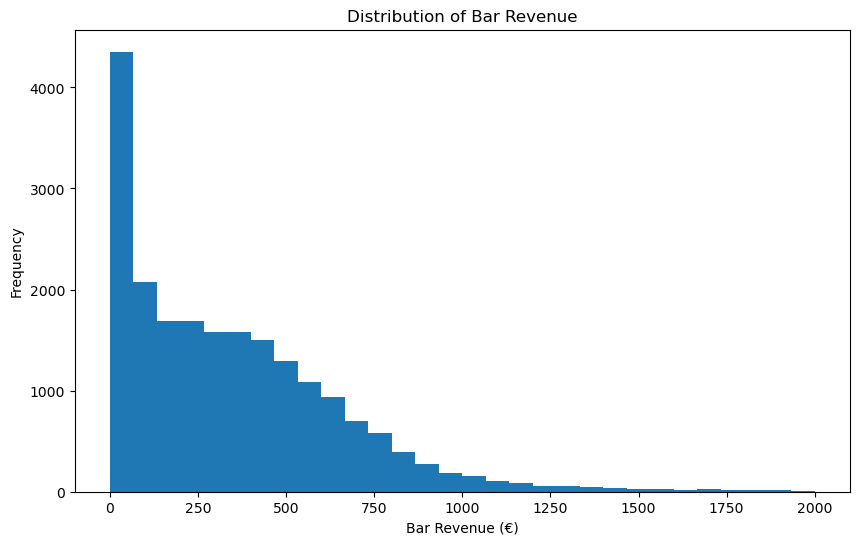

Correlation Matrix:
               BarRevenue  TicketScans      Tmax      Tmin  Neerslag  \
BarRevenue       1.000000     0.190087 -0.005650 -0.016682  0.004082   
TicketScans      0.190087     1.000000 -0.065409 -0.066849  0.010890   
Tmax            -0.005650    -0.065409  1.000000  0.858438 -0.219164   
Tmin            -0.016682    -0.066849  0.858438  1.000000 -0.127961   
Neerslag         0.004082     0.010890 -0.219164 -0.127961  1.000000   
Max Windstoot    0.000969     0.022120 -0.346298 -0.145767  0.355706   

               Max Windstoot  
BarRevenue          0.000969  
TicketScans         0.022120  
Tmax               -0.346298  
Tmin               -0.145767  
Neerslag            0.355706  
Max Windstoot       1.000000  


In [ ]:


# Summary statistics for numeric columns
print(df_merged.describe())

# Distribution of BarRevenue
df_merged["BarRevenue"].plot(kind="hist", bins=30, title="Distribution of Bar Revenue", figsize=(10, 6))
plt.xlabel("Bar Revenue (€)")
plt.show()

# Check correlation between numeric features
correlation_matrix = df_merged[["BarRevenue", "TicketScans", "Tmax", "Tmin", "Neerslag", "Max Windstoot"]].corr()
print("Correlation Matrix:")
print(correlation_matrix)


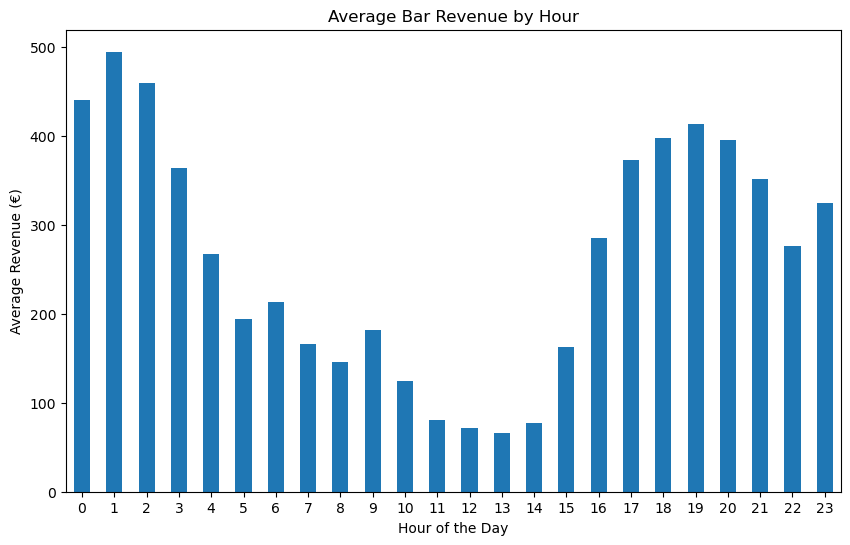

In [32]:
# Average BarRevenue by Hour
revenue_by_hour = df_merged.groupby("Hour")["BarRevenue"].mean()

# Plot
revenue_by_hour.plot(kind="bar", figsize=(10, 6), title="Average Bar Revenue by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Revenue (€)")
plt.xticks(rotation=0)
plt.show()


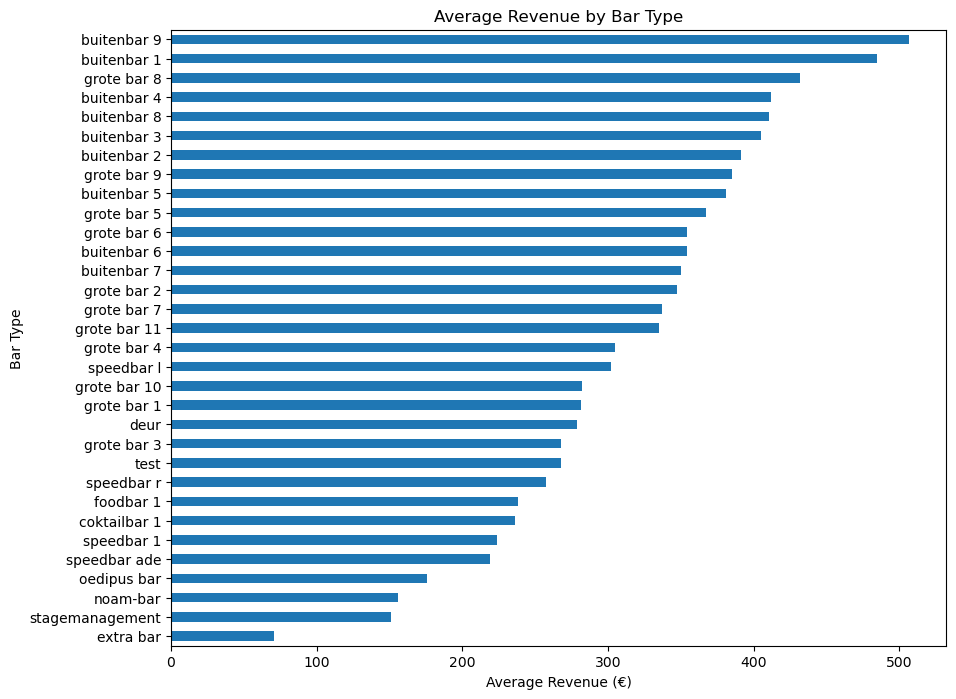

In [33]:
# Average revenue per bar
revenue_by_bar = df_merged.groupby("Virtuele terminalnaam")["BarRevenue"].mean()

# Plot
revenue_by_bar.sort_values().plot(kind="barh", figsize=(10, 8), title="Average Revenue by Bar Type")
plt.xlabel("Average Revenue (€)")
plt.ylabel("Bar Type")
plt.show()


In [34]:
import seaborn as sns

# Step 1: Correlation between Neerslag and BarRevenue
correlation = df_merged[["Neerslag", "BarRevenue"]].corr()
print("Correlation between Neerslag and BarRevenue:")
print(correlation)

# Step 2: Group by precipitation levels
def categorize_precipitation(neerslag):
    if neerslag == 0:
        return "No Rain"
    elif neerslag <= 2:
        return "Light Rain"
    elif neerslag <= 10:
        return "Moderate Rain"
    else:
        return "Heavy Rain"

df_merged["RainCategory"] = df_merged["Neerslag"].apply(categorize_precipitation)

rain_revenue.plot(kind="line", marker="o", figsize=(8, 6))
plt.title("Average Bar Revenue by Rain Category")
plt.xlabel("Rain Category")
plt.ylabel("Average Bar Revenue (€)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Correlation between Neerslag and BarRevenue:
            Neerslag  BarRevenue
Neerslag    1.000000    0.004082
BarRevenue  0.004082    1.000000


NameError: name 'rain_revenue' is not defined

Average Revenue by Hour:
Hour
0     440.124812
1     494.981055
2     460.093572
3     364.167832
4     267.808234
5     194.494570
6     213.795582
7     166.279669
8     145.657143
9     182.373125
10    124.172462
11     80.946125
12     72.235826
13     65.646798
14     77.847041
15    162.776052
16    285.234518
17    372.676653
18    397.393018
19    413.451418
20    395.903592
21    351.859929
22    276.603773
23    324.838727
Name: BarRevenue, dtype: float64


/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_98485/635781364.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_top_bars, x="Hour", y="BarRevenue", hue="Virtuele terminalnaam", ci=None)


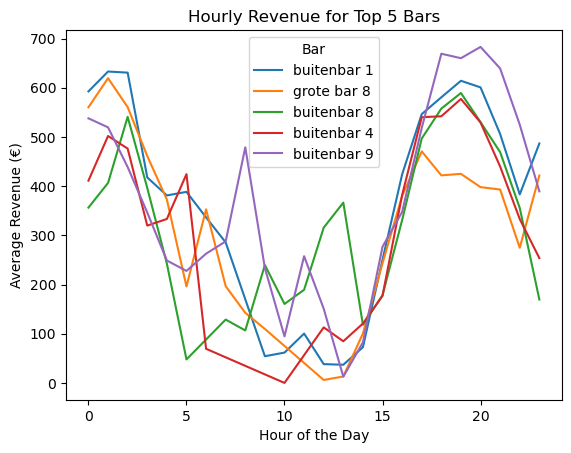

In [35]:
# Step 1: Average revenue by hour
hourly_revenue = df_merged.groupby("Hour")["BarRevenue"].mean()
print("Average Revenue by Hour:")
print(hourly_revenue)

# Step 2: Visualize hourly performance for top-performing bars
top_bars = df_merged.groupby("Virtuele terminalnaam")["BarRevenue"].mean().sort_values(ascending=False).head(5).index
df_top_bars = df_merged[df_merged["Virtuele terminalnaam"].isin(top_bars)]

sns.lineplot(data=df_top_bars, x="Hour", y="BarRevenue", hue="Virtuele terminalnaam", ci=None)
plt.title("Hourly Revenue for Top 5 Bars")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Revenue (€)")
plt.legend(title="Bar")
plt.show()


In [223]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Add StaffNeeded if predicting staff
df_merged["StaffNeeded"] = df_merged["BarRevenue"].apply(lambda x: math.ceil(x / 330))

# Check and fix missing values
numeric_cols = ["Hour", "TicketScans", "Tmax", "Tmin", "Neerslag", "Max Windstoot"]
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(df_merged[numeric_cols].median())
df_merged["Virtuele terminalnaam"] = df_merged["Virtuele terminalnaam"].fillna("unknown")

# Ensure correct data types
df_merged["Hour"] = df_merged["Hour"].astype(int)
df_merged["Virtuele terminalnaam"] = df_merged["Virtuele terminalnaam"].astype(str)

# Define features (X) and target (y)
X = df_merged[["Hour", "TicketScans", "Tmax", "Tmin", "Neerslag", "Max Windstoot", "Virtuele terminalnaam"]]
y = df_merged["BarRevenue"]  # Or df_merged["StaffNeeded"] for staffing predictions

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline: One-hot encode categorical features
categorical_features = ["Virtuele terminalnaam"]
numeric_features = numeric_cols

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Hour', 'TicketScans',
                                                   'Tmax', 'Tmin', 'Neerslag',
                                                   'Max Windstoot']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Virtuele terminalnaam'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [210]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): €{mae:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): €162.73
R² Score: 0.43


In [214]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create a pipeline with GradientBoostingRegressor
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    "model__n_estimators": [50, 200, 800],
    "model__learning_rate": [0.01, 0.05, 0.3],
    "model__max_depth": [3, 6, 7],
    "model__min_samples_split": [5, 20]
}

# Grid search
grid_search = GridSearchCV(
    gb_pipeline,
    param_grid,
    cv=10,
    scoring="r2",
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Metrics
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Best Parameters for Gradient Boosting:", grid_search.best_params_)
print(f"Gradient Boosting MAE: €{gb_mae:.2f}")
print(f"Gradient Boosting R² Score: {gb_r2:.2f}")


Best Parameters for Gradient Boosting: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__min_samples_split': 5, 'model__n_estimators': 800}
Gradient Boosting MAE: €149.91
Gradient Boosting R² Score: 0.52


In [224]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Randomized search with fewer parameter combinations
random_search_gb = RandomizedSearchCV(
    gb_pipeline,
    param_distributions=param_grid_gb,
    n_iter=20,       
    cv=3,            
    scoring="r2",   
    n_jobs=-1,      
    random_state=42 
)

random_search_gb.fit(X_train, y_train)

# Evaluate the best model
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Best Parameters for Gradient Boosting (Randomized Search):", random_search_gb.best_params_)
print(f"Randomized Gradient Boosting MAE: €{gb_mae:.2f}")
print(f"Randomized Gradient Boosting R² Score: {gb_r2:.2f}")


Best Parameters for Gradient Boosting (Randomized Search): {'model__n_estimators': 500, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': 10, 'model__learning_rate': 0.1}
Randomized Gradient Boosting MAE: €143.98
Randomized Gradient Boosting R² Score: 0.55
